In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from faster_rcnn.faster_rcnn import RPN
from faster_rcnn.utils.display.images import imshow, result_show
from faster_rcnn.utils.datasets.adapter import convert_data

from torchviz import make_dot

In [3]:
import cPickle
with open('sorted_index', 'rb') as fp:
    sorted_index = cPickle.load(fp)

In [4]:
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.datasets.mscoco.dataset import CocoData
from faster_rcnn.utils.datasets.data_generator import CocoGenerator
from faster_rcnn.utils.datasets.data_generator import Enqueuer

dataDir = './data/mscoco'
dataType = 'train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
batch_size = 20

images_dir = os.path.join(dataDir,'images', dataType)
cap = CocoData(root = images_dir, annFile = annFile)

data_gen = CocoGenerator(data=cap, batch_size=batch_size, sorted_index=sorted_index)
queue = Enqueuer(generator=data_gen, use_multiprocessing=True)
queue.start(max_queue_size=10, workers=4)
train_data_generator = queue.get()

loading annotations into memory...


DEBUG:faster_rcnn.utils.datasets.data_generator:start
DEBUG:faster_rcnn.utils.datasets.data_generator:try


Done (t=10.08s)
creating index...
index created!


DEBUG:faster_rcnn.utils.datasets.data_generator:task start
DEBUG:faster_rcnn.utils.datasets.data_generator:task start
DEBUG:faster_rcnn.utils.datasets.data_generator:_stop_event False
DEBUG:faster_rcnn.utils.datasets.data_generator:Queue size 0 
DEBUG:faster_rcnn.utils.datasets.data_generator:_stop_event False
DEBUG:faster_rcnn.utils.datasets.data_generator:use_multiprocessing True
DEBUG:faster_rcnn.utils.datasets.data_generator:task start
INFO:faster_rcnn.utils.datasets.data_generator:[65748 47113 52976 18654 39948 65076 19022 48654 53206 57922 33644 38520
 44530 45852  3105 76485 35640 75636 70598 12109]
DEBUG:faster_rcnn.utils.datasets.data_generator:Queue size 0 
DEBUG:faster_rcnn.utils.datasets.data_generator:_stop_event False
DEBUG:faster_rcnn.utils.datasets.data_generator:use_multiprocessing True
DEBUG:faster_rcnn.utils.datasets.data_generator:Next executed
INFO:faster_rcnn.utils.datasets.data_generator:[65748 47113 52976 18654 39948 65076 19022 48654 53206 57922 33644 38520
 44

INFO:faster_rcnn.utils.datasets.data_generator:[40580 60865 49983 78511 66481 55600  5134 31959 14198 53643 51013 14773
 22319  3269 11283   334  4431 77557 14372 25524]
DEBUG:faster_rcnn.utils.datasets.data_generator:Next executed
DEBUG:faster_rcnn.utils.datasets.data_generator:hehehe[40580 60865 49983 78511 66481 55600  5134 31959 14198 53643 51013 14773
 22319  3269 11283   334  4431 77557 14372 25524]
DEBUG:faster_rcnn.utils.datasets.data_generator:20
DEBUG:faster_rcnn.utils.datasets.data_generator:20
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
DEBUG:faster_rcnn.utils.datasets.data_generator:[u'COCO_train2014_000000403585.jpg', u'COCO_train2014_000000387153.jpg', u'COCO_train2014_000000339007.jpg', u'COCO_train2014_000000517253.jpg', u'COCO_train2014_000000235034.jpg', u'COCO_train2014_

DEBUG:faster_rcnn.utils.datasets.data_generator:Queue size 10 
DEBUG:faster_rcnn.utils.datasets.data_generator:use_multiprocessing True
INFO:faster_rcnn.utils.datasets.data_generator:[32068 70686 53510 35706  4183 54059 69598 15130  3873 70972 23267 76495
 36923 64513 21368 56132 46424 40715 72991 74453]
DEBUG:faster_rcnn.utils.datasets.data_generator:Next executed
DEBUG:faster_rcnn.utils.datasets.data_generator:hehehe[32068 70686 53510 35706  4183 54059 69598 15130  3873 70972 23267 76495
 36923 64513 21368 56132 46424 40715 72991 74453]
DEBUG:faster_rcnn.utils.datasets.data_generator:40
DEBUG:faster_rcnn.utils.datasets.data_generator:20
DEBUG:faster_rcnn.utils.datasets.data_generator:[u'COCO_train2014_000000204674.jpg', u'COCO_train2014_000000373063.jpg', u'COCO_train2014_000000213754.jpg', u'COCO_train2014_000000447025.jpg', u'COCO_train2014_000000530635.jpg', u'COCO_train2014_000000083593.jpg', u'COCO_train2014_000000109119.jpg', u'COCO_train2014_000000416102.jpg', u'COCO_train2014

#### Input

- Hình ảnh: là tensor có kích thước

    $[batchsize, dim, im\_height, im\_width]$
    
- bounding box:
    
    $(x_1, y_1, x_2, y_2)$

    - $x_1, y_1$ : tọa độ x,y của điểm trái dưới (lower-left)
    - $x_2, y_2$ : tọa độ x,y của điểm phải trên (top - right)

torch.Size([1, 3, 1167, 600])
[[264.43768997 295.44072948 561.70212766 629.17933131]
 [ 43.76899696 326.443769   207.90273556 605.47112462]]


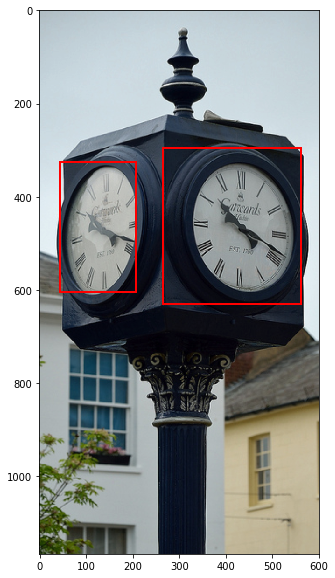

In [12]:
blobs = train_data_generator.next()
first_image = blobs[0]
print blobs[0]['tensor'].shape
print first_image['boxes']
imshow(first_image['tensor'][0], first_image['boxes'])

In [22]:
import time
def train(train_data_gen, epochs, steps_per_epoch):
    
    
    for epoch in range(epochs):
        for step in range(1, steps_per_epoch +1):
            start = time.time()
            blobs = data_gen.next()
            stop = time.time()
            

            if step % 1000 == 1:
                first_image = blobs[0]
                print step
                print blobs[0]['tensor'].shape
                print first_image['boxes']
                imshow(first_image['tensor'][0], first_image['boxes'])
            if step % 100 == 1:
                print "step : %d" % step
                duration = stop-start
                print(duration)



1
torch.Size([1, 3, 800, 600])
[[251.2 380.8 595.2 774.4]
 [286.4  94.4 556.8 788.8]
 [316.8 452.8 352.  475.2]
 [ 65.6 249.6 102.4 299.2]
 [ 57.6 182.4 302.4 700.8]
 [284.8 457.6 312.  476.8]]


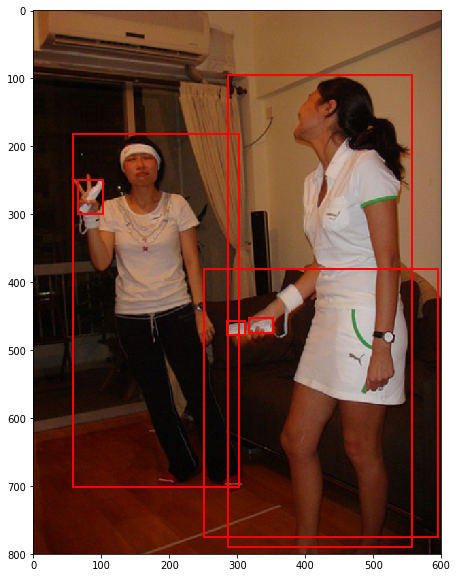

step : 1
0.579130172729


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datas

step : 101
0.525324106216


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack


step : 201
0.474993944168


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack


step : 301
0.473537921906


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datas

step : 401
0.514786958694


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datas

step : 501
0.502549886703


INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datasets.mscoco.dataset:need more than 0 values to unpack
INFO:faster_rcnn.utils.datas

KeyboardInterrupt: 

In [23]:
train(train_data_generator, 2 , 4000)

#### Backbone network

Khi train các bài toán nhận diện (object classification), người ta nhận thấy khi bỏ layer cuối cùng (softmax layer), và feed forward ảnh qua mạng CNN đó, ta thu được một feature vectors. Feature vectors chứa những tính chất quan trọng của ảnh gốc.

Sử dụng các phương pháp như `t-sne`, `PCA` để giảm chiều feature vector, minh họa lên không gian 2(3) chiều thì các object cùng loại với nhau sẽ nằm gần nhau.

[cnnembed](https://cs.stanford.edu/people/karpathy/cnnembed/).

Faster RCNN sử dụng một backbone network, thường là VGG16, Resnet 101 để tính toán feature vector.

In [14]:
from faster_rcnn.faster_rcnn import  RPN
rpn_network = RPN()
rpn_network.cuda()

RPN(
  (features): DataParallel(
    (module): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPool2d(kernel_size=2, stri

In [21]:
batch_tensor, im_info, batch_boxes, batch_boxes_index = convert_data(blobs)
features, rois = rpn_network(batch_tensor, im_info, batch_boxes, batch_boxes_index)

In [22]:
print im_info

[[ 864 1066]]
